In [1]:
import keras
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tf_keras

In [6]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="C:/Users/Frhnx/Downloads/digit-recognizer",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory C:/Users/Frhnx/Downloads/digit-recognizer. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [3]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory=r"C:\KAGGLE\kobe\Sports-celebrity images\test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 96 files belonging to 4 classes.


In [4]:
def process(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [5]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [6]:
num_of_classes = 4

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes,activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2263108 (8.63 MB)
Trainable params: 5124 (20.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [7]:
model.compile(
    optimizer = tf_keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [8]:
model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10



C:\Users\Frhnx\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



14/14 [==============================] - 5s 200ms/step - loss: 1.4496 - acc: 0.3288 - val_loss: 1.0496 - val_acc: 0.4792
Epoch 2/10
14/14 [==============================] - 2s 143ms/step - loss: 0.8844 - acc: 0.6621 - val_loss: 0.6827 - val_acc: 0.7708
Epoch 3/10
14/14 [==============================] - 2s 148ms/step - loss: 0.6290 - acc: 0.7959 - val_loss: 0.4815 - val_acc: 0.8958
Epoch 4/10
14/14 [==============================] - 2s 158ms/step - loss: 0.4907 - acc: 0.8685 - val_loss: 0.3778 - val_acc: 0.9271
Epoch 5/10
14/14 [==============================] - 2s 146ms/step - loss: 0.4031 - acc: 0.9025 - val_loss: 0.3204 - val_acc: 0.9583
Epoch 6/10
14/14 [==============================] - 2s 142ms/step - loss: 0.3452 - acc: 0.9320 - val_loss: 0.2741 - val_acc: 0.9688
Epoch 7/10
14/14 [==============================] - 2s 156ms/step - loss: 0.3023 - acc: 0.9388 - val_loss: 0.2415 - val_acc: 0.9688
Epoch 8/10
14/14 [==============================] - 2s 148ms/step - loss: 0.2630 - acc:

Path of Image: C:\Users\Frhnx\Downloads\images (27).jpg


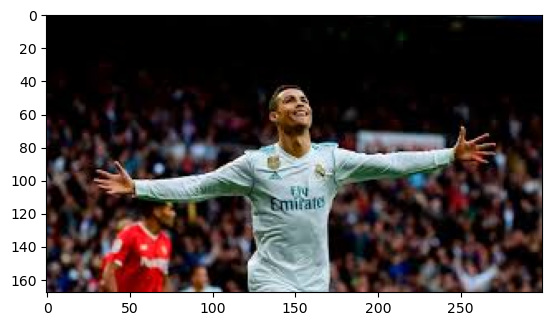

1/1 [==============================] - 0s 203ms/step
This is Ronaldo


In [10]:
input_img=input("Path of Image:")

imgx2 = cv2.imread(input_img)
imgx2 = cv2.cvtColor(imgx2, cv2.COLOR_BGR2RGB)
plt.imshow(imgx2)
plt.show()
imgx2=cv2.resize(imgx2,(224,224))
imgx2=imgx2/255
imgx2=np.reshape(imgx2,[1,224,224,3])
if(np.argmax(model.predict(imgx2))==0):
    print("This is Kane")
elif(np.argmax(model.predict(imgx2))==1):
    print("This is Kobe")
elif(np.argmax(model.predict(imgx2))==2):
    print("This is Maria")
else:
    print("This is Ronaldo")
